In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#problem statement :- to predict the car price
# Get the data

In [3]:
cp = pd.read_csv("car_price.csv")
cp

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.00,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.00,115,5500,18,22,17450
5,2,?,gas,std,two,sedan,fwd,front,99.8,audi,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.50,110,5500,19,25,15250
6,1,158,gas,std,four,sedan,fwd,front,105.8,audi,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.50,110,5500,19,25,17710
7,1,?,gas,std,four,wagon,fwd,front,105.8,audi,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.50,110,5500,19,25,18920
8,1,158,gas,turbo,four,sedan,fwd,front,105.8,audi,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.30,140,5500,17,20,23875
9,0,?,gas,turbo,two,hatchback,4wd,front,99.5,audi,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.00,160,5500,16,22,?


In [4]:
cp.shape

(205, 26)

In [5]:
# Data Cleaning

In [6]:
cp.isnull().sum()

symboling            0
normalized_losses    0
Fuel_type            0
make                 0
num_of_doors         0
aspiration           0
wheel_base           0
engine_location      0
drive_wheels         0
body_style           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [7]:
cp.isnull().sum()[cp.isnull().sum()>0]

Series([], dtype: int64)

In [8]:
cp = cp.replace({'?' : np.nan})
# to convert ? to null values

In [9]:
cp.isnull().sum()

symboling             0
normalized_losses    41
Fuel_type             0
make                  0
num_of_doors          2
aspiration            0
wheel_base            0
engine_location       0
drive_wheels          0
body_style            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [10]:
cp.isnull().sum()[cp.isnull().sum()>0]

normalized_losses    41
num_of_doors          2
bore                  4
stroke                4
horsepower            2
peak_rpm              2
price                 4
dtype: int64

In [11]:
cp.normalized_losses.value_counts()

normalized_losses
161    11
91      8
150     7
128     6
134     6
104     6
95      5
102     5
103     5
74      5
85      5
168     5
94      5
65      5
106     4
122     4
148     4
118     4
93      4
101     3
125     3
137     3
154     3
83      3
115     3
119     2
87      2
194     2
197     2
108     2
89      2
164     2
158     2
145     2
192     2
188     2
81      2
110     2
113     2
129     2
153     2
107     1
78      1
186     1
231     1
77      1
98      1
121     1
90      1
142     1
256     1
Name: count, dtype: int64

In [12]:
cp.normalized_losses = cp.normalized_losses.astype('float')
cp.bore = cp.bore.astype('float')
cp.stroke = cp.stroke.astype('float')
cp.horsepower = cp.horsepower.astype('float')
cp.peak_rpm = cp.peak_rpm.astype('float')

In [13]:
cp.normalized_losses = cp.normalized_losses.fillna(cp.normalized_losses.mean())
cp.bore = cp.bore.fillna(cp.bore.mean())
cp.stroke = cp.stroke.fillna(cp.stroke.mean())
cp.horsepower = cp.horsepower.fillna(cp.horsepower.mean())
cp.peak_rpm = cp.peak_rpm.fillna(cp.peak_rpm.mean())
cp.num_of_doors = cp.num_of_doors.fillna('four')

In [14]:
cp = cp.dropna()

In [15]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    float64
 2   Fuel_type          201 non-null    object 
 3   make               201 non-null    object 
 4   num_of_doors       201 non-null    object 
 5   aspiration         201 non-null    object 
 6   wheel_base         201 non-null    object 
 7   engine_location    201 non-null    object 
 8   drive_wheels       201 non-null    float64
 9   body_style         201 non-null    object 
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  num_of_cylinders   201 non-null    object 
 16  engine_size        201 non-null

In [16]:
# To convert the data type from object column to numeric column

In [17]:
# Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
cp[cp.select_dtypes(include = ['object']).columns] = cp[cp.select_dtypes(include = ['object']).columns].apply(le.fit_transform)

In [19]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    float64
 2   Fuel_type          201 non-null    int32  
 3   make               201 non-null    int32  
 4   num_of_doors       201 non-null    int32  
 5   aspiration         201 non-null    int32  
 6   wheel_base         201 non-null    int32  
 7   engine_location    201 non-null    int32  
 8   drive_wheels       201 non-null    float64
 9   body_style         201 non-null    int32  
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    int32  
 15  num_of_cylinders   201 non-null    int32  
 16  engine_size        201 non-null

In [20]:
cp.shape

(201, 26)

In [21]:
# Sampling

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
cp_train, cp_test = train_test_split(cp, test_size=0.25)

In [24]:
cp_train_x = cp_train.iloc[:, 0:-1]
cp_train_y = cp_train.iloc[:, -1]

In [25]:
cp_test_x = cp_test.iloc[:, 0:-1]
cp_test_y = cp_test.iloc[:, -1]

In [26]:
cp_train_x.shape

(150, 25)

In [27]:
cp_train_x.head()

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
62,0,115.0,1,0,0,3,1,0,98.8,8,177.8,66.5,55.5,2410,2,2,122,1,3.39,3.39,8.6,84.0,4800.0,26,32
148,0,85.0,1,0,0,4,0,0,96.9,18,173.6,65.4,54.9,2420,3,2,108,1,3.62,2.64,9.0,82.0,4800.0,23,29
145,0,102.0,1,1,0,3,0,0,97.0,18,172.0,65.4,54.3,2510,3,2,108,5,3.62,2.64,7.7,111.0,4800.0,24,29
185,2,94.0,1,0,0,3,1,0,97.3,20,171.7,65.5,55.7,2212,2,2,109,5,3.19,3.40,9.0,85.0,5250.0,27,34
172,2,134.0,1,0,1,0,2,0,98.4,19,176.2,65.6,53.0,2975,2,2,146,5,3.62,3.50,9.3,116.0,4800.0,24,30


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
linereg_cp = LinearRegression()

In [30]:
linereg_cp.fit(cp_train_x, cp_train_y)

LinearRegression()

In [31]:
Rsq = linereg_cp.score(cp_train_x, cp_train_y)
Rsq

0.3989548339342427

In [32]:
N = cp_train_x.shape[0]
k = cp_train_x.shape[1]

In [33]:
Adj_Rsq = 1-(1-Rsq)*(N-1)/(N-k-1)
Adj_Rsq

0.27777637303388836

In [34]:
pred_train = linereg_cp.predict(cp_train_x)
pred_test = linereg_cp.predict(cp_test_x)

In [35]:
err_train = cp_train_y - pred_train
err_test = cp_test_y - pred_test

In [36]:
mse = np.mean(np.square(err_test))
mse

2902.380005443415

In [37]:
rmse = np.sqrt(mse)
rmse

53.87374133511998

In [38]:
mape = np.mean(np.abs(err_test * 100 / cp_test_y))
mape

367.7324272347536

In [39]:
# lets check the assumptions
# Error terms are normally distrubuted 

In [40]:
import matplotlib.pyplot as plt

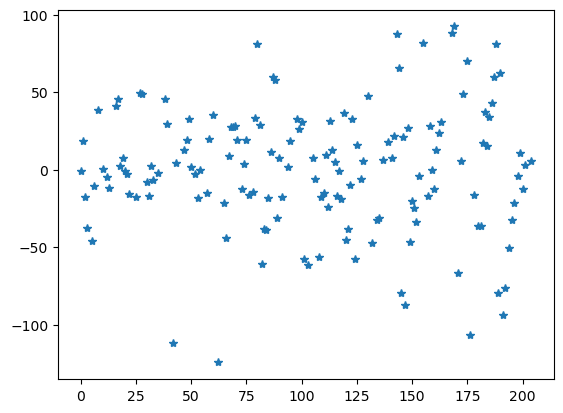

In [41]:
plt.plot(err_train, '*')

(array([ 3.,  2.,  6., 13., 24., 35., 30., 24.,  7.,  6.]),
 array([-124.49390322, -102.79915412,  -81.10440501,  -59.40965591,
         -37.71490681,  -16.02015771,    5.67459139,   27.3693405 ,
          49.0640896 ,   70.7588387 ,   92.4535878 ]),
 <BarContainer object of 10 artists>)

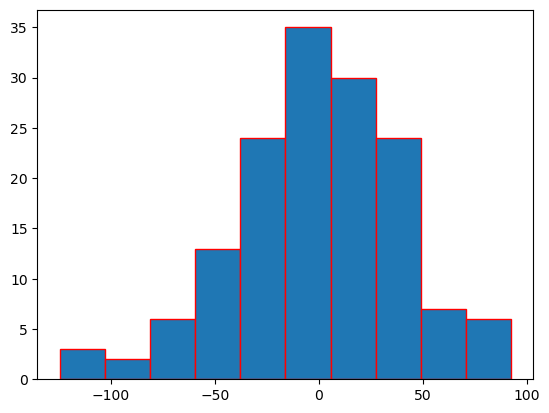

In [42]:
plt.hist(err_train, bins =10, edgecolor = 'r')
# Histogram is used to check if the errors are normally distrubuted or not

In [43]:
pred_actual_df = pd.DataFrame()

In [44]:
pred_actual_df['Actual'] = cp_train_y
pred_actual_df['Predicted'] = pred_train 

In [45]:
pred_actual_df.head()

,Actual,Predicted
62,1,125.493903
148,153,126.291348
145,13,92.784391
185,156,122.250829
172,62,56.212780


In [46]:
import seaborn as sns

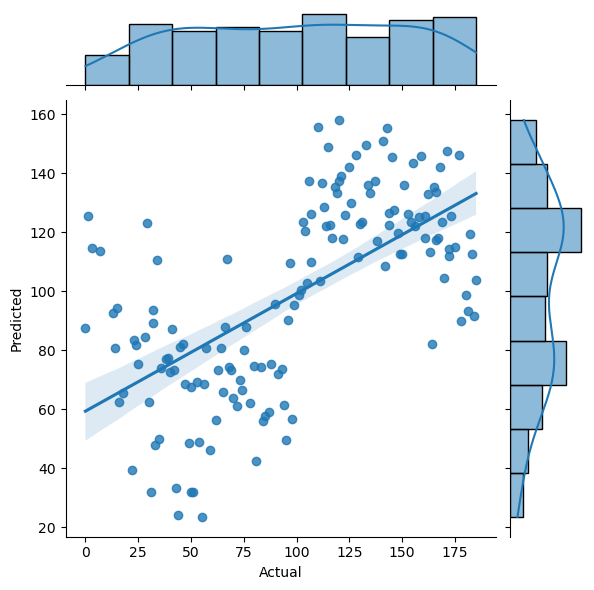

In [47]:
# To plot the regression line
sns.jointplot(x='Actual', y='Predicted', data=pred_actual_df, kind='reg')

In [48]:
def remove_outliers(df, col, k):
    mean = df[col].mean()
    global df1
    sd = df[col].std()
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean + k *sd)]
    df1 = df.loc[df[col]. isin(final_list)];print(df1.shape)
    print('Number of outliers removed ---->' , df.shape[0] - df1.shape[0])

In [49]:
remove_outliers(cp, 'price', 3)

(201, 26)
Number of outliers removed ----> 0
